In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split # 用于切分数据集
from sklearn.metrics import accuracy_score # 计算预测准确率


In [14]:
class LogisiticRegression:
    def __init__(self,epoch,learn_rate):
        self.epoch = epoch
        self.learn_rate = learn_rate
        # 初始化模型参数w
        self.w = None
        # 存储损失值
        self.loss = []
        # 存储最终迭代数（如果有终止条件）
        self.i = 0
         
    # 矩阵化X
    def _preprocess_X(self,X):
        # one = np.ones((x.shape[0],1))
        # x_x = np.c_[x,one]
        m, n = X.shape
        x_ = np.empty((m, n+1))
        x_[:, 0] = 1
        x_[:, 1:] = X
        return x_
     
    def _z(self,X,w):
        # 计算X与w的内积
        return np.dot(X,w)

    def _sigmoid_fun(self,z):
        # # logistic 函数
        # return 1.0/(1.0 + np.exp(-z))
        # if z >= 0:  # 对sigmoid函数的优化，避免了出现极大的数据溢出
        #     return 1.0 / (1 + np.exp(-z))
        # else:
        #     return np.exp(z) / (1 + np.exp(z))
        x_ravel = z.ravel()  # 将numpy数组展平
        length = len(x_ravel)
        y = []
        for index in range(length):
            if x_ravel[index] >= 0:
                y.append(1.0 / (1 + np.exp(-x_ravel[index])))
            else:
                y.append(np.exp(x_ravel[index]) / (np.exp(x_ravel[index]) + 1))
        return np.array(y).reshape(z.shape)
    
    def _predict_y(self,X,w):
        z = self._z(X,w)
        return self._sigmoid_fun(z)
    
    def _loss(self, y, y_p):
        # 计算损失值即J(w)
        p = y @ np.log(y_p+1e-5)+(1-y) @ np.log(1-y_p+1e-5)
        return - p / y.size
    
    def _greadient(self, X, y, y_p):
        # 计算梯度
        # J(w) = 1/m*(y_p-y) @ X
        # return np.matmul(y_p - y, X) / y.size
        return (y_p - y) @ X / y.size
    
    def _greadient_descent(self,w,X,y):
        # 梯度下降算法
        for i in range(self.epoch):
            y_p = self._predict_y(X,w)
            loss = self._loss(y,y_p)
            self.loss.append(loss)
            # 查看损失值
            # print('迭代次数%s,损失值%s'%(i,loss))
            #计算梯度
            grad = self._greadient(X,y,y_p)
            # 更新公式
            w -= self.learn_rate * grad
        self.i = i
              
    def train(self,x_train,y_train):
        # 数据预处理
        X_train = self._preprocess_X(x_train)
        # y_train = y_train
        # 初始化参数向量w （使用下划线'_'代替变量表示不使用）
        _, n =  X_train.shape
        self.w = np.random.random(n) * 0.05
        # 梯度下降训练w
        self._greadient_descent(self.w,X_train,y_train)
        
    def predict(self,X):
        # 预处理
        x = self._preprocess_X(X)
        y_p = self._predict_y(x, self.w)
        # 根据概率预测类别，p >= 0.5为正例，否则返回负例
        return np.where(y_p >= 0.5,1,0)


真实值:[0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 1. 1. 1. 1. 1.
 0. 0. 0. 1. 0. 1. 0. 1. 1. 1. 0. 1. 0. 1. 0.],
预测值:[1 1 0 0 0 0 1 0 0 1 0 1 1 1 1 1 0 1 0 1 1 1 1 1 0 1 0 1 0 1 0 1 1 1 0 1 0
 1 0]
预测准确率: 0.8974358974358975


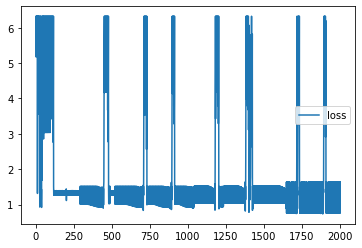

In [15]:
# 获数据集
x = np.genfromtxt('wine.data', delimiter=',', usecols=range(1,14))
y = np.genfromtxt('wine.data', delimiter=',', usecols=0)
idx = y != 3
x = x[idx];y = y[idx]-1
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)
# x = list(x[idx]);y = list(y[idx]-1)
# 分成训练集和预测集
# x_train = np.array(x[:49]+x[66:127]);y_train = np.array(y[:49]+y[66:127])
# x_predict = np.array(x[49:66]+x[127:]);y_predict_true = np.array(y[49:66]+y[127:])
# print(x_train)
# print(y_train)
# print(x_predict)
# print(y_predict_true)
# 模型训练
model = LogisiticRegression(2000,0.01)
model.train(x_train,y_train)
loss = model.loss # 损失值变化表
i = model.i
epoch = np.linspace(0,2000,2000)
y_predict = model.predict(x_test)
print("真实值:%s,\n预测值:%s"%(y_test,y_predict))
accuracy = accuracy_score(y_test,y_predict)
print("预测准确率:",accuracy)
plt.figure()
plt.plot(epoch,loss,label='loss')
plt.legend()
plt.show()

# 2.Logistic回归（分类）

## 注：

1.`lab`为手动实现`Logistic`二分类代码及结果（使用梯度下降算法，推导过程见下文）

2.`Office`和`scipy_opt_example`为老师代码

3.`work`为基本作业。(Readme的所有内容也会放在其中)

4.`wine.data`为`lab`所使用的数据集https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data

## 1.作业内容

基本要求：

- 使用`sklearn`实现`logistic`回归
- 回归问题：拟合数据： (选取合适的区间)
- 分类问题：生成随机样本点，采用标准数据集

提高练习：

- 尝试使用`spicy.optimize`中的优化算法训练`logistic regression`并与`sklearn`比较
- 尝试手动实现梯度下降**【必修】**

## **2.实现梯度下降原理**

### 	1.线性模型

$$
假设超平面方程：w^Tx+b=0\\
(1) 在超平面上方的点满足：w^Tx+b=0>0\\
(2) 在超平面下方的点满足：w^Tx+b=0<0\\
$$

### 	2.Logistic函数

$$
\sigma(z) = \frac {1} {1+e^{-z}}\\
$$

​	

### 	3.Logistic模型

$$
假设函数为：h_{w}(x) = \sigma(g(x)) = \frac {1} {1+e^{-w^Tx}}\\
即z = g(x) = w^Tx
$$

### 	4.极大似然估计求损失函数

$$
h_w(x)的概率意义为：P_{(y=1|x)}=h_w(x);P_{(y=0|x)}=1-h_w(x)\\
因此将实例x_i，预测为y_i的概率为：
\color{red}P_{(y=y_i|x_i;w)}=h_w{(x_i)}^{y_i}(1-h_w{(x_i)}^{1-y_i})\\
极大似然估计求得损失函数：
J(w)=-\frac{1}{m}\sum^m_{i=1}y_iIn(h_w(x_i))+(1-y_i)In(1-h_w(x_i))\\
$$

### 	5.梯度下降更新公式

$$
对J(w)求梯度\nabla{J(w)}:
\nabla{J(w)}=\frac{1}{m}\sum^m_{i=1}(h_w(x_i)-y_i)x_i\\
假设学习率为\eta,则模型参数w的更新公式为：
w:=w-\eta\nabla{J(w)}
$$



## 3.实验结果

见`lab.ipynb`

## 4.实验总结

#### 1.小结：

（1）通过改进Logistic回归函数，解决数据溢出问题

（2）使用`from sklearn.metrics import accuracy_score` 计算预测准确率

（3）使用`np.genfromtxt`读取data文件,获取数据集

#### 2.问题：

1、`RuntimeWarning ': divide by zero encountered in log`：运行时警告 '：在日志中遇到除以0

2、`overflow encountered in exp`：在 exp 中遇到溢出